# Statistical Hypothesis Testing

- Normality Tests
- One sample t-test
- Two sample t test [Independent sample & paired sample]
- ANOVA
- Chi-Square test
- Fisher's Exact test

In [1]:
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
print('Data is: ', data, '\n')


Data is:  [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.36, -1.478, -1.637, -1.869] 



**Normality Test**

Null Hypothesis H0: The data follows normal distribution

Alternate Hypothesis H1: The data does not follow normal distribution


## Normality Tests

Tests whether a data sample has a Gaussian distribution.

- Shapiro-Wilk Test
- D’Agostino’s K^2 Test
- Anderson-Darling Test

**Null Hypothesis H0: Data follows a Gaussian distribution.
Laternate Hypothesis H1:  Data does not follow a Gaussian distribution.**

***Decision Rule***

If p values < alpha; the reject the Null
Means The data does not follow normal distribution

If p values > alpha; the fail to reject the Null
Means The data follows normal distribution

alpha = 0.01 or 0.05 or 0.1

**Interpretaion:** 
- If p value < $alpha$; the reject the null - Data might not be normally distributed.
- If p value > $alpha$; the fail to reject the null - Data might be normally distributed.
​
If p value = alpha. For me it is. There is only 5% probabilty that your result is due to chance, and 95% due to what you tested.
​
https://www.researchgate.net/post/If_p-value_is_exactly_equal_to_005_is_that_significant_or_insignificant

In [3]:
# Accessing normality of data using Shapiro-Wilk test

from scipy.stats import shapiro

stat, p = shapiro(data)

print('test statistic is', stat, '\n')

print('corresponding p_value is', p, '\n')

# Or we can print like this

print('Shapiro wilk statistics=%.3f, p=%.3f' % (stat, p), '\n')

test statistic is 0.8951009511947632 

corresponding p_value is 0.19340917468070984 

Shapiro wilk statistics=0.895, p=0.193 



In [10]:
alpha = 0.05

if p < alpha:
    print('The data does not follow normal distribution')
else:
    print('The data follows normal distribution')

The data follows normal distribution


In [4]:
# D’Agostino’s K^2 Test

from scipy.stats import normaltest

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
print('Data is: ', data, '\n')

stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p), '\n')

Data is:  [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.36, -1.478, -1.637, -1.869] 

stat=3.392, p=0.183 



D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [5]:
alpha = 0.05

if p > alpha:
	print('Probably Gaussian at ', alpha, ' level of significance')
else:
	print('Probably not Gaussian ', alpha, ' level of significance') 
    
    
    
# UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10   

Probably Gaussian at  0.05  level of significance


In [6]:
# Anderson-Darling Test

from scipy.stats import anderson

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

result = anderson(data)
print(result, '\n')

print('stat=%.3f' % (result.statistic), '\n')

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f %% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f %% level' % (sl))

AndersonResult(statistic=0.4239737141854807, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

stat=0.424 

Probably Gaussian at the 15.0 % level
Probably Gaussian at the 10.0 % level
Probably Gaussian at the 5.0 % level
Probably Gaussian at the 2.5 % level
Probably Gaussian at the 1.0 % level


**Excercises:**

 1. use graphical methods to access normality of the data
 2. Use one sample t-test to test the hypothesis of population mean being equal to zero

**One Sample T-test**

For estimating population parameter (like mean) based on sample mean 

Null Hypothesis H0: There is no difference between sample mean & population mean  

Alternative Hypothesis H1: There is STATISTICALLY SIGNIFICANT difference between sample mean & population mean  

***Decision Rule***

If p values < alpha; the reject the Null
Means The data does not follow normal distribution

If p values > alpha; the fail to reject the Null
Means The data follows normal distribution

alpha = 0.01 or 0.05 or 0.1

In [7]:
import os
os.getcwd()
os.chdir('D:\Career\My Training Material\Edvancer Oct 2019 Data Science_R\Data\Data')
os.getcwd()

'D:\\Career\\My Training Material\\Edvancer Oct 2019 Data Science_R\\Data\\Data'

In [8]:
import pandas as pd

df = pd.read_csv('winequality-white.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [20]:
df.shape

(4898, 12)


### Check if the population mean of the variable 'fixed acidity' is equal to the specified value [H0=6.10] or not

- Null hypothesis H0 is that population mean for  the variable 'fixed acidity' is 6.10
- Alternative hypothesis is that population mean for  the variable 'fixed acidity' is not 6.10

One sample t-test should be used to test the hypothesis.

***Assumptions of one sample t-test***
- numeric data
- independent observation
- representative sample
- normality of the data/variable

In [9]:
# To check if 'fixed acidity' is normally distributed or not

stats, p = shapiro(df['fixed acidity'])

alpha = 0.05

if p < alpha:
    print('The data does not follow normal distribution')
else:
    print('The data follows normal distribution')

The data does not follow normal distribution


In [12]:
# As sample size is large enough, we can still use t-test

from scipy.stats import ttest_1samp

stats, p = ttest_1samp(df['fixed acidity'], 6.10)

alpha = 0.05


In [14]:
if p < alpha:
    print('population mean for  the variable fixed acidity  is not 6.10 at ', alpha, ' level of significance')
else:
    print('population mean for  the variable fixed acidity is  6.10 at ', alpha, ' level of significance')

population mean for  the variable fixed acidity  is not 6.10 at  0.05  level of significance


**Excercises:**
    1. Change the value of alpha & observe the result. Interpret your findings
    2. experiment with the values of population mean & observe the result carefully. Interpret your findings.
    3. Do the same excercise for Othernvaribles of the data set 
    [Both normality testing & one sample t- test for some hypothetical mean]
    4. You might also want to access normality by using graphics. Did you get the same obervations as by the test?
    


**North Carolina births**

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

variable description fage father's age in years. mage mother's age in years. mature maturity status of mother. weeks length of pregnancy in weeks. premie whether the birth was classified as premature (premie) or full-term. visits number of hospital visits during pregnancy. marital whether mother is married or not married at birth. gained weight gained by mother during pregnancy in pounds. weight weight of the baby at birth in pounds. lowbirthweight whether baby was classified as low birthweight (low) or not (not low). gender gender of the baby, female or male. habit status of the mother as a nonsmoker or a smoker. whitemom whether mom is white or not white.

Let's check if weight is normally distributed or not.

In [17]:
import pandas as ps

nc = pd.read_csv("https://www.openintro.org/stat/data/nc.csv")
nc

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
5,NaN,15,younger mom,38.0,full term,19.0,married,22.0,5.38,low,male,nonsmoker,not white
6,18.0,15,younger mom,37.0,full term,12.0,married,76.0,8.44,not low,male,nonsmoker,not white
7,17.0,15,younger mom,35.0,premie,5.0,married,15.0,4.69,low,male,nonsmoker,not white
8,NaN,16,younger mom,38.0,full term,9.0,married,NaN,8.81,not low,male,nonsmoker,white
9,20.0,16,younger mom,37.0,full term,13.0,married,52.0,6.94,not low,female,nonsmoker,white


In [16]:
nc.dtypes

fage              float64
mage                int64
mature             object
weeks             float64
premie             object
visits            float64
marital            object
gained            float64
weight            float64
lowbirthweight     object
gender             object
habit              object
whitemom           object
dtype: object

In [20]:
from scipy.stats import shapiro

shapiro(nc.weight)

alpha = 0.05

# P value < 0.005
# reject Null
# not Gaussian

**Baby Weight & Smoking habit of mother**

Consider the possible relationship between a mother's smoking habit and the weight of her baby. 
Explore graphically Write the hypothesis if the average weights of babies born to smoking and non-smoking mothers are different. Use hypothesis testing to verify if the smoking habit of mother afffects weight of the newborn baby.

weight - numerical
habit - categorical with 2 categories

Visuals - side by side box plot 
Test - 2 independent sample t-test

### Let's visualize

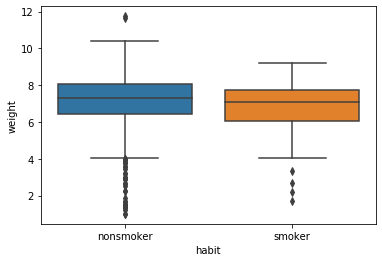

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="habit", y="weight", data=nc)

plt.show()

### Assumptions of 2 ind sample t-test

- normality of weight for each group of habit
- homogeinity of variance

In [25]:
wt_smoker = nc[nc['habit'] == 'smoker']['weight']
wt_nonsmoker = nc[nc['habit'] == 'nonsmoker']['weight']



(873,)

In [26]:
print('Average weight of babies for smoker mothers is ', wt_smoker.mean(), '\n')

print('Average weight of babies for non-smoker mothers is ', wt_nonsmoker.mean())

Average weight of babies for smoker mothers is  6.828730158730158 

Average weight of babies for non-smoker mothers is  7.144272623138631


In [27]:
from scipy.stats import shapiro

shapiro(wt_smoker)

# p value < 0.05 - reject Null - Not normal

(0.9442487955093384, 5.527625762624666e-05)

In [28]:
shapiro(wt_nonsmoker)
# p value < 0.05 - reject Null - Not normal

(0.9260313510894775, 2.6304698908355736e-20)

In [29]:
# let's compare sample size

print(wt_smoker.shape)

print(wt_nonsmoker.shape)

(126,)
(873,)


As normality assumption is violated and sample sizes are also not comparable, we should use non-parametric alternative such as 
Mann Whitney U test

But just for illustration purpose, let's do t-test

In [31]:
from scipy.stats import ttest_ind

stats, p = ttest_ind(wt_smoker, wt_nonsmoker)

print('T-statistics = %.3f, p Value = %.3f' %(stats, p))

T-statistics = -2.203, p Value = 0.028


In [32]:
alpha = 0.05

if p < alpha:
    print('Mean weight of babies for both group is not same')
else:
    print('Mean weight of babies for both group is same')

Mean weight of babies for both group is not same


### Paired Sample t-test

In [35]:
import os
os.getcwd()
os.chdir("D:\Career\Edyoda_Zekelabs")
os.getcwd()
df = pd.read_csv(r"blood_pressure.csv")
df.head()


,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [36]:
df.drop('patient', axis=1, inplace=True)
df.head()

,sex,agegrp,bp_before,bp_after
0,Male,30-45,143,153
1,Male,30-45,163,170
2,Male,30-45,153,168
3,Male,30-45,153,142
4,Male,30-45,146,141


**compare two pair-wise means**

The objective - to compare the mean of two variables 'bp_before' & 'bp_after'

As the samples/groups are related, we can use paired sample t-test

In [40]:
print('mean BP level before treatment', df['bp_before'].mean())
print('average BP level after treatment', df['bp_after'].mean())

mean BP level before treatment 156.45
average BP level after treatment 151.35833333333332


In [38]:
from scipy.stats import ttest_rel

stats, p = ttest_rel(df.bp_before, df.bp_after)

print('p value is ', p)

p value is  0.0011297914644840823


In [39]:
alpha = 0.05

if p < alpha:
    print('The population mean of two variables bp_before & bp_after are not same')
else:
    print('The population mean of two variables bp_before & bp_after are same')

The population mean of two variables bp_before & bp_after are not same


### One-way ANOVA [Analysis of variance] or F-test

In [44]:
data = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")
data

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4
5,6,2,5
6,7,2,2
7,8,2,4
8,9,2,2
9,10,2,3


In [42]:
data.shape

(15, 3)

In [43]:
data.dtypes

person    int64
dose      int64
libido    int64
dtype: object

**To test average value of libido for all categories of dose variable**

libido - Numerical variable
dose - categorical variable [3 categories]

one way anova
 


In [46]:
data['dose'].replace({1:'placebo', 2:'low', 3:'high'}, inplace=True)
data.dtypes

person     int64
dose      object
libido     int64
dtype: object

- normality 
- homogenity of variance

In [48]:
# Homogeniety of variance

# Null Hypothesis: All the groups have equal variance

from scipy.stats import levene

stats.levene(data['libido'][data['dose']=='placebo'],
            data['libido'][data['dose']=='low'],
            data['libido'][data['dose']=='high'])

AttributeError: 'numpy.float64' object has no attribute 'levene'

In [49]:
# one-way anova

# Null Hypothesis: All the groups have same mean
# Alternate Hypothesis: At least one of the group has different mean

from scipy.stats import f_oneway

stats.f_oneway(data['libido'][data['dose']=='placebo'],
            data['libido'][data['dose']=='low'],
            data['libido'][data['dose']=='high'])

AttributeError: 'numpy.float64' object has no attribute 'f_oneway'

**Other considerations**
- non-Parametric test [U test, H test]
- Weltch Test
- post-hoc test